## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [12]:


% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image




Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [14]:
def ImResize(im, size = 3, method='nearest'):
    print ('The resize method is {}'.format(method))
    im_resize = misc.imresize(im, size, interp = method)
    return im_resize

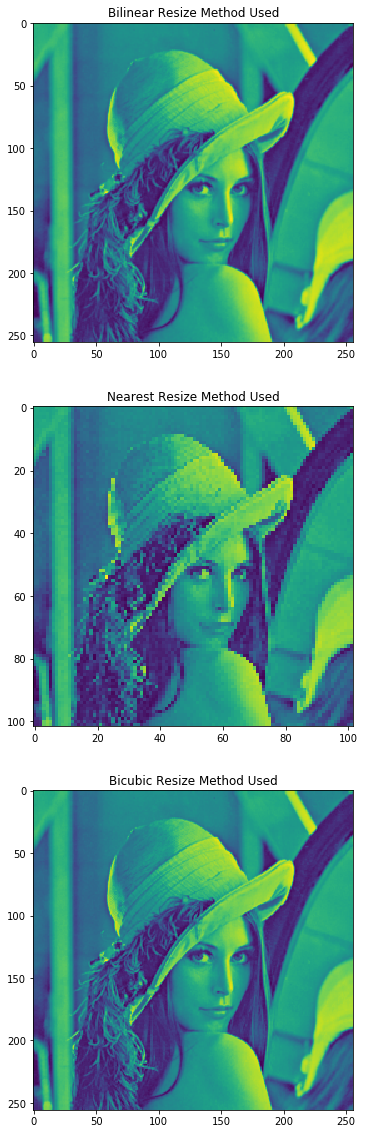

In [15]:
lena = './images/lena-grey.bmp'
I = io.imread(lena)
#Transforming the image into float
I2 = img_as_float(I)
io.imsave('./images/lena-im-float.png',I2)

#My Function for resizing

Bili = misc.imresize(I2, size=0.5, interp='bilinear', mode=None)
Near = misc.imresize(I2, size=0.2, interp='nearest', mode=None)
Bicb = misc.imresize(I2, size=0.5, interp='bicubic', mode=None)

#Plotting the image
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))
ax0, ax1, ax2= axes.ravel()

#Plot for Bilinear Method
ax0.imshow(Bili)
ax0.set_title('Bilinear Resize Method Used')
#Plot for Nearest Method
ax1.imshow(Near)
ax1.set_title('Nearest Resize Method Used')
#Plot for Bicubic Method
ax2.imshow(Bicb)
ax2.set_title('Bicubic Resize Method Used')



**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [16]:
def simple_blend(im1, im2):
    
    size = 500
    
    im1 = ImResize(im1, (size,size) , 'bilinear')
    im2 = ImResize(im2, (size,size) , 'bilinear')
    
    ResultImage = [[0 for x in range(size)] for y in range(size)] 
    
    i = 0
    while i < size:
        j = 0

        if i <= size/2:
            while j < size:
                ResultImage[j][i] = im1[j][i]
                j = j +1
                
        if i > size/2:
            while j < size:
                ResultImage[j][i] = im2[j][i]
                j = j +1
        i = i + 1
    
    return ResultImage


In [17]:
def alpha_blend(im1, im2, step):
    
    size = 500
    
    im1 = ImResize(im1, (size,size) , 'bilinear')
    im2 = ImResize(im2, (size,size) , 'bilinear')
    
    ResultImage = [[0 for x in range(size)] for y in range(size)] 
    
    
    i = 0
    while i < size:
        j = 0
        alpha = (i - size/2) /step 
        if alpha < 0:
            alpha = 0
            
        if alpha > 1:
            alpha = 1
        
        while j < size:
            ResultImage[j][i] = alpha * im1[j][i] + (1-alpha) * im2[j][i]
            j = j + 1
    
        i = i + 1
        
    return ResultImage

The resize method is bilinear
The resize method is bilinear
The resize method is bilinear
The resize method is bilinear


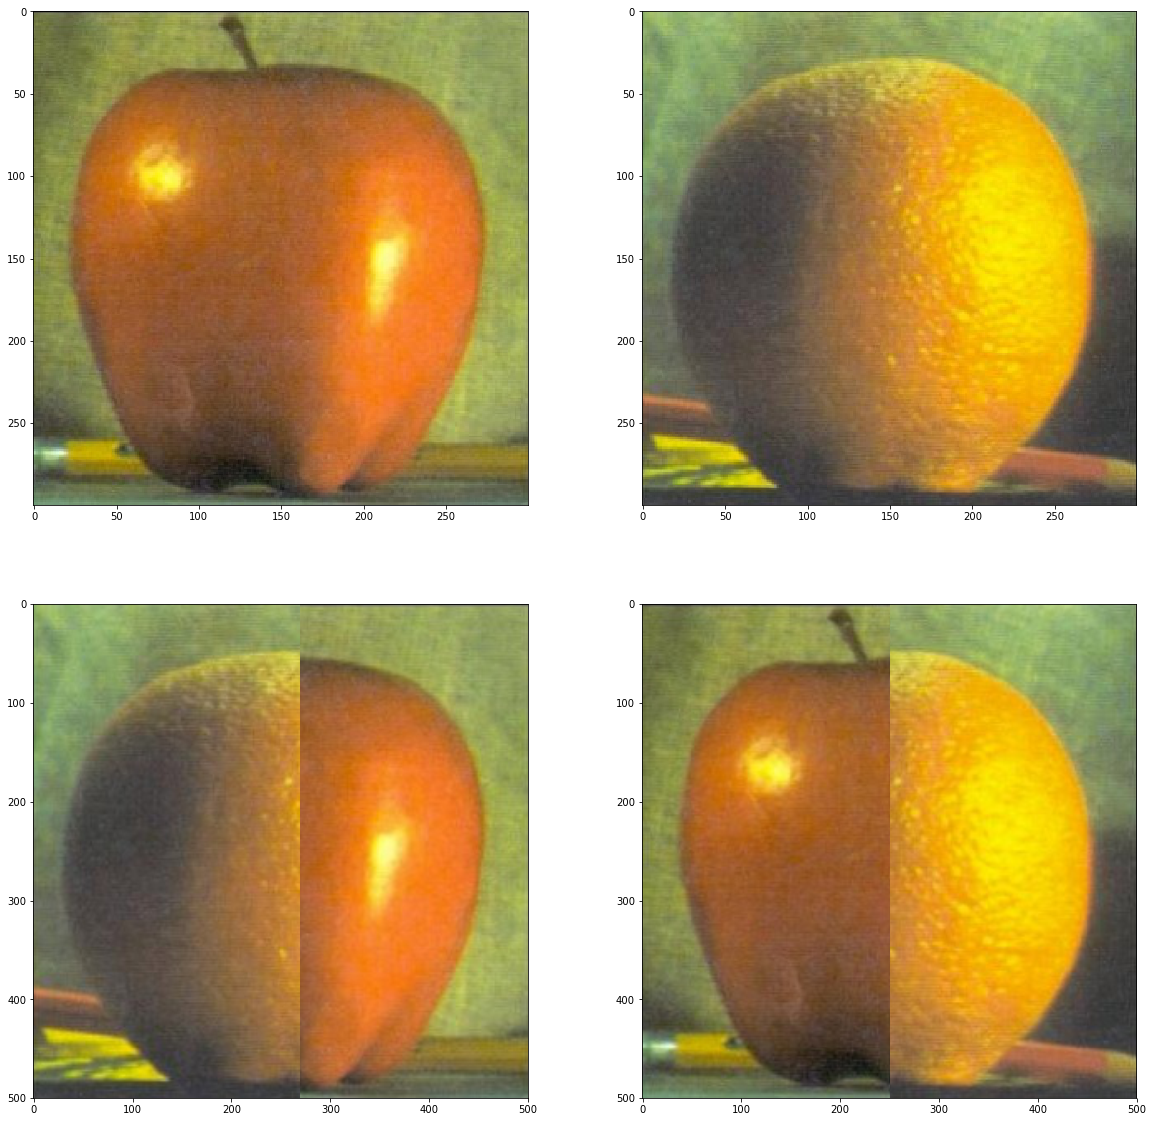

In [18]:
apple = io.imread('./images/apple.jpeg')
appleF = img_as_float(apple)

orange = io.imread('./images/orange.jpeg')
orangeF = img_as_float(orange)

new = alpha_blend(apple, orange, 20)
newS = simple_blend(apple, orange)

f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()



ax[0].imshow(apple)
ax[1].imshow(orange)
ax[2].imshow(new)
ax[3].imshow(newS)